In [1]:
import numpy as np
import pandas as pd

import torch
import time
import copy
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, cross_val_score

import brevitas.nn as nn

from config import *
from classic_models import *
from data_preprocessing import *
from feature_extraction import *
from helpers import *

from torch.utils.data import DataLoader
from tslearn.preprocessing import TimeSeriesScalerMinMax

import warnings
warnings.filterwarnings("ignore")

['dab1_guiyong.json', 'dab1_john.json', 'dab1_kelvin.json', 'dab1_xiaoxue.json', 'dab2_guiyong.json', 'dab2_john.json', 'dab2_kelvin.json', 'dab2_xiaoxue.json', 'dab2_yujie.json', 'elbowkick1_guiyong.json', 'elbowkick1_john.json', 'elbowkick1_kelvin.json', 'elbowkick1_xiaoxue.json', 'elbowkick2_guiyong.json', 'elbowkick2_john.json', 'elbowkick2_kelvin.json', 'elbowkick2_xiaoxue.json', 'elbowkick2_yujie.json', 'gun1_guiyong.json', 'gun2_kelvin.json', 'gun2_xiaoxue.json', 'gun2_yujie.json', 'hair1_guiyong.json', 'hair2_guiyong.json', 'hair2_john.json', 'hair2_kelvin.json', 'hair2_xiaoxue.json', 'hair2_yujie.json', 'listen1_guiyong.json', 'listen1_john.json', 'listen1_kelvin.json', 'listen1_xiaoxue.json', 'listen2_guiyong.json', 'listen2_john.json', 'listen2_kelvin.json', 'listen2_xiaoxue.json', 'listen2_yujie.json', 'pointhigh1_guiyong.json', 'pointhigh1_john.json', 'pointhigh1_kelvin.json', 'pointhigh1_xiaoxue.json', 'pointhigh2_guiyong.json', 'pointhigh2_john.json', 'pointhigh2_kelvin.

In [2]:
from sklearn import preprocessing
df_train = pd.read_csv('out_14_train.csv')
# df_train = df_train.iloc[:, list(range(0,24)) + [-1]]
df_test = pd.read_csv('out_14_test.csv')
# df_test = df_test.iloc[:, list(range(0,24)) + [-1]]

df_train['tag'] = df_train['tag'].apply(lambda x: int(x-1))
df_test['tag'] = df_test['tag'].apply(lambda x: int(x-1))

df_train.sample(10)

,mean_accel1,mean_accel2,mean_accel3,mean_gyro1,mean_gyro2,mean_gyro3,max_accel1,max_gyro2,max_gyro3,min_accel1,...,var_coeff_accel2,var_coeff_accel3,var_coeff_gyro1,var_coeff_gyro2,var_coeff_gyro3,kurtosis_accel1,kurtosis_gyro1,kurtosis_gyro2,kurtosis_gyro3,tag
1143,0.668119,0.985103,0.422021,0.565783,0.003360,0.189031,0.370013,0.282929,-1.643560,0.371576,...,0.801587,0.104308,0.454649,-0.001526,0.165679,0.199546,0.283333,0.374186,-0.167532,1
3520,0.451269,0.626057,0.043805,0.504182,0.000057,0.145163,0.017728,0.321677,1.714472,0.505162,...,0.818594,0.149660,0.507937,-0.000217,0.113115,0.015306,0.658333,0.234539,2.904601,4
72,0.627669,0.864923,0.395891,0.627461,0.000031,0.141099,0.238354,0.224798,-1.208979,0.367714,...,0.696145,0.260771,0.530045,-0.001058,0.104420,0.103175,0.350000,0.195341,0.387367,0
2070,0.692831,0.938826,0.433621,0.722992,-0.000272,0.164475,0.344356,0.237396,-1.560021,0.416354,...,0.903628,0.124717,0.519841,0.004200,0.217995,0.376417,0.100000,0.407463,-1.127534,2
537,0.658494,0.843768,0.387313,0.707271,-0.000496,0.151164,0.274444,0.229559,-1.273418,0.391867,...,0.797052,0.223356,0.497166,0.002012,0.133998,0.120465,0.316667,0.272592,-0.036707,0
2315,0.372534,0.579413,0.125370,0.480723,-0.000060,0.145606,0.265812,0.390853,-1.557040,0.575411,...,0.835601,0.198413,0.512472,0.000038,0.160068,0.121599,0.325000,0.313229,-0.307018,2
2266,0.358725,0.578955,0.130224,0.340975,0.000716,0.143608,0.283365,0.400329,-1.707399,0.592865,...,0.891156,0.140590,0.508503,-0.004162,0.194840,0.254252,0.300000,0.389165,-0.734310,2
1806,0.736368,0.997588,0.461827,0.785051,-0.004102,0.185563,0.397418,0.251997,-1.597917,0.434951,...,0.856009,0.238095,0.503401,0.003472,0.206890,0.419218,0.291667,0.381698,-1.441032,2
3065,0.318966,0.554290,0.081993,0.293934,0.000409,0.159737,0.318172,0.500797,-1.639269,0.580804,...,0.839002,0.178005,0.536281,0.002452,0.188247,0.323980,0.166667,0.366433,-1.182453,3
2362,0.673639,0.996337,0.460393,0.517919,0.000569,0.198147,0.401974,0.294144,-1.681663,0.439744,...,0.942177,0.079365,0.506236,0.002683,0.220299,0.210034,0.283333,0.428754,-0.486991,2


In [3]:
# from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
# reg = LassoCV()
# reg.fit(X, y)
# print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
# print("Best score using built-in LassoCV: %f" %reg.score(X,y))
# coef = pd.Series(reg.coef_, index = X.columns)

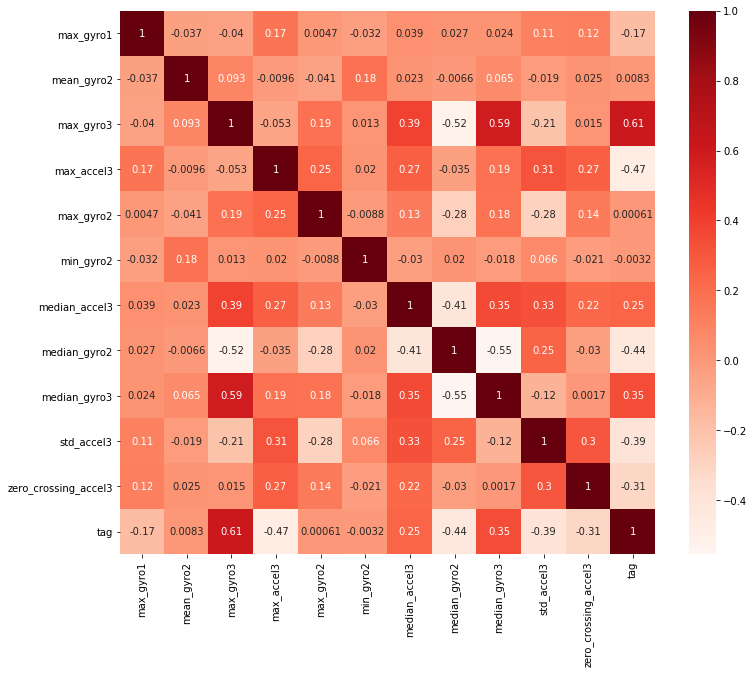

In [117]:
import seaborn as sns
# mean gyro 2, max accel 3, max gyro 2, min gyro 2, median gyro 2, std accel 3, zero crossing accel 3, 
# recurring dp gyro 2, kurtosis gyro 2
plt.figure(figsize=(12,10))
cor = df_train.iloc[:, list(range(12,24)) + [-1]].corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
df_tag = df_train['tag']
df_train = df_train[['max_gyro1', 'mean_gyro2', 'max_gyro3', 'max_accel3', 'max_gyro2', 'min_gyro2', \
                'median_accel3', 'median_gyro2', 'median_gyro3','std_accel3', 'zero_crossing_accel3']]
df_train['tag'] = df_tag
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
df_train.sample(15)

,max_gyro1,mean_gyro2,max_gyro3,max_accel3,max_gyro2,min_gyro2,median_accel3,median_gyro2,median_gyro3,std_accel3,zero_crossing_accel3,tag
4790,0.0500,0.000033,-1.688614,11.0,0.259166,-0.002309,12.0,0.221775,-0.254035,13.0,16.0,2
5557,0.0125,-0.000610,-1.678728,10.0,0.312262,0.001095,9.0,0.266879,-0.922786,16.0,12.0,3
5347,0.0625,-0.002135,-1.704161,7.0,0.248734,-0.002043,6.0,0.279928,-1.222144,14.0,9.0,3
2489,0.0250,-0.000152,-0.702779,10.0,0.270775,0.000740,13.0,0.190652,-1.125435,14.0,18.0,1
12469,0.0125,-0.000323,-1.090158,7.0,0.196719,0.000858,13.0,0.331645,-0.632587,13.0,12.0,7
3450,0.0125,-0.001750,-0.820530,12.0,0.226888,-0.000175,11.0,0.232819,-1.268656,10.0,14.0,2
1084,0.0125,-0.002199,-0.660628,7.0,0.317213,0.002490,10.0,0.266921,-0.068679,9.0,13.0,0
12733,0.0250,-0.001963,-1.011308,9.0,0.142481,0.000570,12.0,0.185690,-0.735768,12.0,13.0,7
5008,0.0250,-0.001069,-1.794405,16.0,0.393932,-0.001622,10.0,0.222664,-0.232082,11.0,16.0,2
10822,0.0000,0.001936,-0.182680,9.0,0.264035,0.001505,13.0,0.254479,-0.771159,10.0,13.0,6


In [3]:
class FeatureDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df
        if isinstance(df, pd.DataFrame):
            df_np = df.to_numpy()

        self.X = df_np[:,:-1]
        self.y = df_np[:,-1]

    def __getitem__(self, idx):
        # get item by index
        return self.X[idx], self.y[idx]

    def __len__(self):
        # returns length of data
        return len(self.X)

50 55 60 65 70 75 80 85 90 95 100

In [4]:
dataset = FeatureDataset(df_train)
D_in = 72 # df.shape[1]-1
D_out = 8

In [39]:
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv1d, MaxPool1d, Module, Softmax, BatchNorm1d, Dropout, Flatten

class CNN(torch.nn.Module):
    def __init__(self, d_in, d_hidden, d_out):
        super(CNN, self).__init__()
        self.relu = torch.nn.ReLU()
        self.conv1 = torch.nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5)
        self.conv2 = torch.nn.Conv1d(in_channels=64,out_channels=64, kernel_size=5)
        self.conv3 = torch.nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5)
        self.conv4 = torch.nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5)
        self.conv5 = torch.nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5)
        self.conv6 = torch.nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5)
        self.fc1 = torch.nn.Linear(48, 24)
        self.fc2 = torch.nn.Linear(24, d_out)
        
    def forward(self,x):
        # x = x.float().unsqueeze(dim=1)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = x[:, -1]
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
    def load(self, model_path):
        self.load_state_dict(torch.load(model_path))
        self.eval()

    def predict(self, X):
        outputs = self(X.float())
        _, predicted = torch.max(outputs, 1)
        return predicted

In [40]:
import torch
from torchvision import models
from torchsummary import summary


model = CNN(D_in, 64, D_out)
summary(model, (1, 72))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 68]             384
              ReLU-2               [-1, 64, 68]               0
            Conv1d-3               [-1, 64, 64]          20,544
              ReLU-4               [-1, 64, 64]               0
            Conv1d-5               [-1, 64, 60]          20,544
              ReLU-6               [-1, 64, 60]               0
            Conv1d-7               [-1, 64, 56]          20,544
              ReLU-8               [-1, 64, 56]               0
            Conv1d-9               [-1, 64, 52]          20,544
             ReLU-10               [-1, 64, 52]               0
           Conv1d-11               [-1, 64, 48]          20,544
             ReLU-12               [-1, 64, 48]               0
           Linear-13                   [-1, 24]           1,176
           Linear-14                   

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)
summary(model, (1, 28, 28))

RuntimeError: Expected 3-dimensional input for 3-dimensional weight [64, 1, 5], but got 4-dimensional input of size [2, 1, 28, 28] instead

In [7]:
def train_val_model(model, criterion, optimizer, num_epochs=25,
        scheduler=None, log_interval=None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Store losses and accuracies accross epochs
    losses, accuracies = dict(train=[], val=[]), dict(train=[], val=[])

    # tscv = TimeSeriesSplit(n_splits=9)#, max_train_size=5000)
    kf = KFold(n_splits=9)
    X_train, X_test, y_train, y_test = train_test_split(
        dataset.X.reshape(dataset.X.shape[0],-1), dataset.y, test_size=0.1, random_state=0
    )
    confusion_matrix = torch.zeros(8, 8)

    for i in range(num_epochs):
        if log_interval is not None and i % log_interval == 0:
            print('Epoch {}/{}'.format(i, num_epochs - 1))
            print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
        # for fold, (train_index, test_index) in enumerate(tscv.split(X_train, y_train)):
        for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
            ### Dividing data into folds
            x_train_fold = X_train[train_index]
            x_test_fold = X_train[test_index]
            y_train_fold = y_train[train_index]
            y_test_fold = y_train[test_index]

            print('Train Index Length:', len(x_train_fold), end='\t\t')
            print('Test Index Length:', len(x_test_fold), end='\n\n')

            train = torch.utils.data.TensorDataset(torch.tensor(x_train_fold), torch.tensor(y_train_fold))
            test = torch.utils.data.TensorDataset(torch.tensor(x_test_fold), torch.tensor(y_test_fold))
            train_loader = torch.utils.data.DataLoader(train, batch_size = 20, shuffle = False)
            test_loader = torch.utils.data.DataLoader(test, batch_size = 20, shuffle = False)

            running_loss = 0.0
            running_corrects = 0
            model.train()
            for batch_index, (x_batch, y_batch) in enumerate(train_loader):
                optimizer.zero_grad()
                y_pred = model(x_batch)
                _, preds = torch.max(y_pred, 1)
                for t, p in zip(y_batch.view(-1), preds.view(-1)):
                        confusion_matrix[t.long(), p.long()] += 1
                single_loss = criterion(y_pred, y_batch.long().view(-1))
                single_loss.backward()
                optimizer.step()
                
                running_loss += single_loss.item() * x_batch.size(0)
                running_corrects += torch.sum(preds == y_batch.data)
            print('Fold No. {}/{}\tEpoch {}/{}\t'.format(fold + 1 , kf.get_n_splits(X_train), i + 1, num_epochs), end='')
            print(f'loss: {single_loss.item():10.8f}')
            
            nsamples = len(train_index)
            epoch_loss = running_loss / nsamples
            epoch_acc = running_corrects.double() / nsamples

            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_acc)
            if log_interval is not None and i % log_interval == 0:
                print('{} Loss: {:.4f} Acc: {:.2f}%'.format(
                    phase, epoch_loss, 100 * epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.2f}%'.format(100 * best_acc))
    print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    return model, losses, accuracies

In [8]:
model = CNN(D_in, 64, D_out)
# optimizer = optim.SGD(model.parameters(), lr=0.125, momentum=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
criterion = torch.nn.CrossEntropyLoss()

# Explore the model
for parameter in model.parameters():
    print(parameter.shape)

print("Total number of parameters =", np.sum([np.prod(parameter.shape) for parameter in model.parameters()]))

torch.Size([64, 1, 5])
torch.Size([64])
torch.Size([64, 64, 5])
torch.Size([64])
torch.Size([64, 64, 5])
torch.Size([64])
torch.Size([64, 64, 5])
torch.Size([64])
torch.Size([64, 64, 5])
torch.Size([64])
torch.Size([64, 64, 5])
torch.Size([64])
torch.Size([24, 48])
torch.Size([24])
torch.Size([8, 24])
torch.Size([8])
Total number of parameters = 104480


In [9]:
NUM_EPOCHS = 1
model, losses, accuracies = train_val_model(model, criterion, optimizer, num_epochs=NUM_EPOCHS, log_interval=1)

Epoch 0/0
----------
Train Index Length: 3525		Test Index Length: 441

Fold No. 1/9	Epoch 1/1	loss: 1.69407463
val Loss: 1.9364 Acc: 25.59%
Train Index Length: 3525		Test Index Length: 441

Fold No. 2/9	Epoch 1/1	loss: 1.07255495
val Loss: 1.2530 Acc: 54.87%
Train Index Length: 3525		Test Index Length: 441

Fold No. 3/9	Epoch 1/1	loss: 0.72621781
val Loss: 1.0092 Acc: 63.55%
Train Index Length: 3525		Test Index Length: 441

Fold No. 4/9	Epoch 1/1	loss: 0.49467343
val Loss: 0.8605 Acc: 68.85%
Train Index Length: 3525		Test Index Length: 441

Fold No. 5/9	Epoch 1/1	loss: 0.37625051
val Loss: 0.7694 Acc: 73.25%
Train Index Length: 3525		Test Index Length: 441

Fold No. 6/9	Epoch 1/1	loss: 0.25526831
val Loss: 0.6724 Acc: 76.54%
Train Index Length: 3526		Test Index Length: 440

Fold No. 7/9	Epoch 1/1	loss: 0.19336462
val Loss: 0.5951 Acc: 79.18%
Train Index Length: 3526		Test Index Length: 440

Fold No. 8/9	Epoch 1/1	loss: 0.16302769
val Loss: 0.5408 Acc: 81.93%
Train Index Length: 3526		T

In [10]:
window_size = 120
overlap = 110
NUM_EPOCHS = 4
print(D_out, window_size, overlap, NUM_EPOCHS)

8 120 110 4


In [11]:
name = f'CNN_Model_moves_{D_out}_ws{window_size}_ol{overlap}_epoch{NUM_EPOCHS}'
torch.save(model.state_dict(), name)

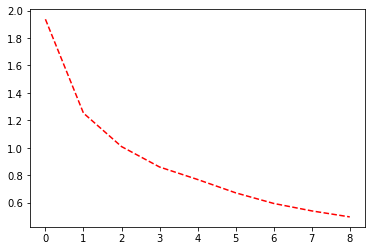

In [12]:
_ = plt.plot(losses['train'], '-b', losses['val'], '--r')

In [13]:
cnn_model = CNN(D_in, 8, D_out)
cnn_model.load(name)
cnn_model.eval()

for to_predict in range(D_out):
    df_target = df_test[df_test['tag'] == to_predict]

    df_random = df_test

    df_filtered = torch.from_numpy(np.array(pd.merge(df_target, df_random))[:,:-1])
    output = cnn_model.predict(df_filtered)
    # print(output)
    proba_dict = {}

    for x in output:
        x = int(x)
        if x not in proba_dict:
            proba_dict[x] = 1
        else:
            proba_dict[x] += 1
    for k in proba_dict.keys():
        proba_dict[k] /= len(output)

    print(dict(sorted(proba_dict.items(), key=lambda item: -item[1])))

{0: 0.5570469798657718, 5: 0.2953020134228188, 2: 0.09395973154362416, 7: 0.03355704697986577, 1: 0.013422818791946308, 4: 0.006711409395973154}
{1: 0.7474747474747475, 2: 0.12626262626262627, 7: 0.0707070707070707, 4: 0.025252525252525252, 0: 0.025252525252525252, 6: 0.005050505050505051}
{2: 0.532258064516129, 1: 0.3064516129032258, 4: 0.12365591397849462, 0: 0.026881720430107527, 3: 0.010752688172043012}
{3: 0.5778546712802768, 4: 0.11764705882352941, 5: 0.09342560553633218, 1: 0.08996539792387544, 0: 0.06920415224913495, 7: 0.01730103806228374, 2: 0.01730103806228374, 6: 0.01730103806228374}
{4: 0.5770609318996416, 1: 0.11469534050179211, 2: 0.1003584229390681, 3: 0.06093189964157706, 0: 0.05734767025089606, 7: 0.03225806451612903, 6: 0.02867383512544803, 5: 0.02867383512544803}
{5: 0.6911764705882353, 1: 0.13725490196078433, 7: 0.07352941176470588, 3: 0.0392156862745098, 0: 0.024509803921568627, 6: 0.014705882352941176, 2: 0.00980392156862745, 4: 0.00980392156862745}
{6: 0.6751592

In [14]:
def feature_extract(df, window_size):
    full_features = np.array([])
    axis = ['accel1', 'accel2', 'accel3', 'gyro1', 'gyro2', 'gyro3']
    titles = np.ravel(np.array([i+'_'+j for i in feature_list for j in axis]))

    # print("Begin Feature Extraction")
    windows = set_sliding_windows(df, 100, window_size)
    # print(windows.shape)
    # windows = set_windows(df, window_size)

    for window in windows:
        for _,ax in enumerate(window.T):
                full_features = np.append(full_features, add_mean(ax))
                full_features = np.append(full_features, add_max(ax))
                full_features = np.append(full_features, add_min(ax))
                full_features = np.append(full_features, add_median(ax))
                full_features = np.append(full_features, add_gradient(ax))
                full_features = np.append(full_features, add_std(ax))
                full_features = np.append(full_features, add_iqr(ax))
                # full_features = np.append(full_features, add_skew(ax))
                full_features = np.append(full_features, add_zero_crossing_count(ax))
                # full_features = np.append(full_features, add_cwt(ax))
                full_features = np.append(full_features, add_no_peaks(ax))
                full_features = np.append(full_features, add_recurring_dp(ax))
                # full_features = np.append(full_features, add_ratio_v_tsl(ax))
                # full_features = np.append(full_features, add_sum_recurring_dp(ax))
                full_features = np.append(full_features, add_var_coeff(ax))
                full_features = np.append(full_features, add_kurtosis(ax)) 

    full_features = full_features.reshape(
        -1,
        len(feature_list) * 6,
    )   
    full_features_df = pd.DataFrame(full_features)
    full_features_df.columns = titles
    return full_features_df

def feature_extraction(data):
    data = pd.DataFrame.from_dict(data)
    if 'dance' in data:
        del data['dance']

    df = data.apply(pd.to_numeric).interpolate(method='polynomial', order=2)
    col = df.columns
    '''
    accel1    16377
    accel2    15638
    accel3    16383
    gyro1       357
    gyro2       363
    gyro3       421
    dtype: int64 accel1   -16382
    accel2   -14090
    accel3    -8726
    gyro1      -340
    gyro2      -337
    gyro3      -412
    '''
    max_arr = [16377, 15638, 16383, 357, 363, 421]
    min_arr = [-16382, -14090, -8726, -340, -337, -412]
    
    def normalize(df):
        result = df.copy()
        for i, feature_name in enumerate(df.columns):
            max_value = max_arr[i]
            min_value = min_arr[i]
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        return result
    
    df_scaled = normalize(df) 
    # df_scaled = df.apply(lambda x: (x - max(x)) / (max(x) - min(x)))
    # print(df_scaled)
    # print(min(x), max(x))
    # min_max_scaler = preprocessing.MinMaxScaler()
    # df_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(df_scaled, columns=col)
    df.reset_index(drop=True, inplace=True)

    # print(df.shape)
    features = feature_extract(df, window_size=120).reset_index(drop=True)
    # print(features.shape)
    return features

def smoothing(dataset):
    # train, test = dataset[dataset.columns.difference(['tag', 'dance'])], dataset['tag']
    dataset = _savgol_filter(dataset)
    return dataset

def _savgol_filter(dataset):
    return savgol_filter(dataset, 5, 3, mode='nearest')

In [15]:
import json

cnn_model = CNN(D_in, 70, D_out)
# name = f'CNN_Model_moves_8_ws120_ol110_epoch1'
cnn_model.load(name)
cnn_model.eval()

feature_list = [
    'mean', 
    'max', 
    'min', 
    'median', 
    'gradient', 
    'std', 
    'iqr', 
    # 'skew', 
    'zero_crossing',
    # 'cwt', 
    'no_peaks', 
    'recurring_dp', 
    # 'ratio_v_tsl', 
    # 'sum_recurring_dp', 
    'var_coeff', 
    'kurtosis'
]

dances = ['dab', 'elbowkick', 'gun', 'hair', 'listen', 'pointhigh', 'sidepump', 'wipetable']
# dances = ['gun', 'hair', 'sidepump']
# dances = ['elbowkick', 'pointhigh', 'wipetable']
persons = ['kelvin', 'guiyong', 'xiaoxue', 'john']
beetles = ['1', '2']

test_range = 1
leap = 200
truth, total, skipped = 0,0,0
for i in range(0,0+test_range):
    print("Phase:", i)
    start, end = i * leap, i * leap + leap
    for d in dances:
        print(d)
        df_full = pd.DataFrame()
        collection = [np.array([]) for x in range(16)]
        j = 0
        for p in persons:
            for b in beetles:
                move_json = 'collected_data/' + d + b + '_' + p + '.json'
                try:
                    with open(move_json) as f:
                        x = json.load(f)
                except FileNotFoundError:
                    continue
                x = pd.DataFrame.from_dict(x)[start:end]
                # x = smoothing(x)
                x = feature_extraction(x)
                df_target = torch.from_numpy(np.array(x))
                output = cnn_model.predict(df_target)
                proba_dict = {}

                for x in output:
                    x = int(x)
                    if x not in proba_dict:
                        proba_dict[x] = 1
                    else:
                        proba_dict[x] += 1
                for k in proba_dict.keys():
                    proba_dict[k] /= len(output)

                print(dict(sorted(proba_dict.items(), key=lambda item: -item[1])))

Phase: 0
dab
Set sliding windows: 5
Sliding: 0
{1: 0.8, 0: 0.2}
Set sliding windows: 5
Sliding: 0
{1: 1.0}
Set sliding windows: 5
Sliding: 0
{7: 0.4, 4: 0.2, 0: 0.2, 2: 0.2}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{1: 0.8, 4: 0.2}
Set sliding windows: 5
Sliding: 0
{7: 0.6, 1: 0.4}
Set sliding windows: 5
Sliding: 0
{4: 0.4, 3: 0.2, 2: 0.2, 1: 0.2}
elbowkick
Set sliding windows: 5
Sliding: 0
{4: 0.8, 1: 0.2}
Set sliding windows: 5
Sliding: 0
{4: 0.6, 5: 0.4}
Set sliding windows: 5
Sliding: 0
{1: 1.0}
Set sliding windows: 5
Sliding: 0
{2: 1.0}
Set sliding windows: 5
Sliding: 0
{2: 0.6, 1: 0.2, 7: 0.2}
Set sliding windows: 5
Sliding: 0
{2: 0.6, 1: 0.2, 7: 0.2}
Set sliding windows: 5
Sliding: 0
{1: 0.8, 4: 0.2}
Set sliding windows: 5
Sliding: 0
{1: 0.8, 4: 0.2}
gun
Set sliding windows: 5
Sliding: 0
{1: 0.8, 2: 0.2}
Set sliding windows: 5
Sliding: 0
{1: 1.0}
Set sliding windows: 5
Sliding: 0
{2: 0.8, 4: 0.2}
hair

In [174]:
cnn_model = CNN(D_in, 70, D_out)
cnn_model.load(name)
cnn_model.eval()

directory = 'collected_data'
entries = sorted(os.listdir(directory))

test_range = 3
leap = 200
truth, total, skipped = 0,0,0

persons = ['4', '5']
for i in range(0,0+test_range):
    print("Phase:", i)
    start, end = i * leap, i * leap + leap
    for p in persons:
        for b in range(9):
            move_csv = 'New Folder/dancer_' + str(p) + '_move_' + str(b) + '_hand.csv'
            try:
                x = pd.read_csv(move_csv)
            except FileNotFoundError:
                continue
            x = pd.DataFrame.from_dict(x)[start:end]
            x.columns = ['accel1', 'accel2','accel3','gyro1','gyro2','gyro3','ts']
            del x['ts']
            # x = smoothing(x)
            x = feature_extraction(x)
            df_target = torch.from_numpy(np.array(x))
            output = cnn_model.predict(df_target)
            proba_dict = {}

            for x in output:
                x = int(x)
                if x not in proba_dict:
                    proba_dict[x] = 1
                else:
                    proba_dict[x] += 1
            for k in proba_dict.keys():
                proba_dict[k] /= len(output)

            print(dict(sorted(proba_dict.items(), key=lambda item: -item[1])))

Phase: 0
Set sliding windows: 5
Sliding: 0
{2: 1.0}
Set sliding windows: 5
Sliding: 0
{2: 0.6, 0: 0.4}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 0.6, 2: 0.2, 7: 0.2}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 0.6, 2: 0.4}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Phase: 1
Set sliding windows: 5
Sliding: 0
{2: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 0.6, 2: 0.4}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 0.6, 2: 0.4}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{2: 0.8, 0: 0.2}
Set sliding windows: 5
Sliding: 0
{0: 0.6, 2: 0.4}
Phase: 2
Set sliding windows: 5
Sliding: 0
{2: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sliding windows: 5
Sliding: 0
{0: 1.0}
Set sl

In [157]:
dataset.df.head()

,mean_accel1,mean_accel2,mean_accel3,mean_gyro1,mean_gyro2,mean_gyro3,max_accel1,max_accel2,max_accel3,max_gyro1,...,var_coeff_gyro1,var_coeff_gyro2,var_coeff_gyro3,kurtosis_accel1,kurtosis_accel2,kurtosis_accel3,kurtosis_gyro1,kurtosis_gyro2,kurtosis_gyro3,tag
0,0.574342,0.873378,0.341006,0.568912,-0.000410,0.145556,0.246558,0.0,8.0,0.0,...,0.522109,-0.001059,0.115088,0.174320,0.0,6.0,0.31875,0.220590,-0.741908,0
1,0.579769,0.873378,0.341006,0.594524,0.000011,0.144495,0.244215,0.0,7.0,0.0,...,0.522109,0.000014,0.126058,0.181122,0.0,6.0,0.29375,0.245784,-0.821795,0
2,0.585194,0.873378,0.341006,0.602842,0.001963,0.147015,0.256891,0.0,8.0,0.0,...,0.522109,-0.000071,0.124492,0.175737,0.0,6.0,0.30625,0.243916,-0.759393,0
3,0.593536,0.873378,0.341006,0.620074,0.000014,0.145055,0.237767,0.0,7.0,0.0,...,0.531179,0.001538,0.123797,0.177154,0.0,7.0,0.32500,0.238041,-0.665742,0
4,0.596305,0.873378,0.341006,0.623355,0.000762,0.148177,0.245330,0.0,6.0,0.0,...,0.531746,-0.000205,0.116268,0.152211,0.0,7.0,0.34375,0.220197,-0.358156,0


In [656]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(dataset.X, dataset.y, stratify=dataset.y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=20).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

0.5099818511796733

In [225]:
from tslearn.shapelets import KNeighborsTimeSeries

ModuleNotFoundError: No module named 'sklearn.cluster.k_means_'

In [227]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
for i, ts in enumerate(tsli):
    data = [[x, i] for x in ts]
    df_train = df_train.append(data, ignore_index=True)
df_train.columns = ['value', 'id']
extract_features(df_train, default_fc_parameters=settings)

NameError: name 'tsli' is not defined